<a href="https://colab.research.google.com/github/sudeshna0501/twitter-sentiment-analysis/blob/main/BERT_%2B_Lexicon_%2B_CNN_dense_softmax_on_US_airline_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/Tweets.csv')

In [ ]:
X= df['text']
Y= df['airline_sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(df['airline_sentiment'])

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

In [ ]:
X = X.apply(clean_doc)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def joining(ele):
 return " ".join(str(v) for v in ele)


In [ ]:
snt_emb = X.apply(joining)

In [ ]:
snt_emb = snt_emb.tolist()

In [ ]:
!pip install sentence-transformers --quiet

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = sbert_model.encode(snt_emb)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the maximum document length
def max_length(lines):
	return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
	# integer encode
	encoded = tokenizer.texts_to_sequences(lines)
	# pad encoded sequences
	padded = pad_sequences(encoded, maxlen=length, padding='post')
	return padded

  #for calculating length
def joining(ele):
  return " ".join(str(v) for v in ele)


In [ ]:
pos_words_list=pd.read_csv('/content/gdrive/My Drive/pos_words.txt')

In [ ]:
pos_words_list.columns=['word']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving neg_words.txt to neg_words.txt


In [ ]:
file_name = "neg_words.txt"
neg_words = uploaded[file_name].decode('latin-1').encode("utf-8")

In [ ]:
neg_words_list = neg_words.decode().split("\r\n")

In [ ]:
v=[]
v1_norm = 0
v2_norm = 0
for tweet in X:
  tokenizer = create_tokenizer(tweet)
  vocab = tokenizer.word_index
  vocab_list = list(vocab.keys())
  vocab_list= set(vocab_list)
  v1 = len(vocab_list. intersection(pos_words_list['word']))
  v2 = len(vocab_list. intersection(neg_words_list))
  if v1!=0 or v2!=0:
    v1_norm=v1/(v1+v2)
    v2_norm=v2/(v1+v2)
  v.append([v1_norm, v2_norm])

In [ ]:
arr_con = []
i=0
for x in sentence_embeddings:
  con=np.concatenate((x,v[i]))
  arr_con.append(con)
  i+=1

In [ ]:
arr_con = np.array(arr_con)

In [ ]:
X_train, X_test, y_train, y_test = \
train_test_split(arr_con, dummy_y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 770,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 770,1).astype('float32')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from keras.utils.vis_utils import plot_model

Epoch 1/10
1172/1172 [==============================] - 6s 4ms/step - loss: 0.7040 - accuracy: 0.7045
Epoch 2/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.6269 - accuracy: 0.7563
Epoch 3/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5889 - accuracy: 0.7602
Epoch 4/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5746 - accuracy: 0.7682
Epoch 5/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5681 - accuracy: 0.7686
Epoch 6/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5659 - accuracy: 0.7682
Epoch 7/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5623 - accuracy: 0.7734
Epoch 8/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5547 - accuracy: 0.7779
Epoch 9/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.5585 - accuracy: 0.7719
Epoch 10/10
1172/1172 [==============================] - 4s 3ms/step - loss: 0.556

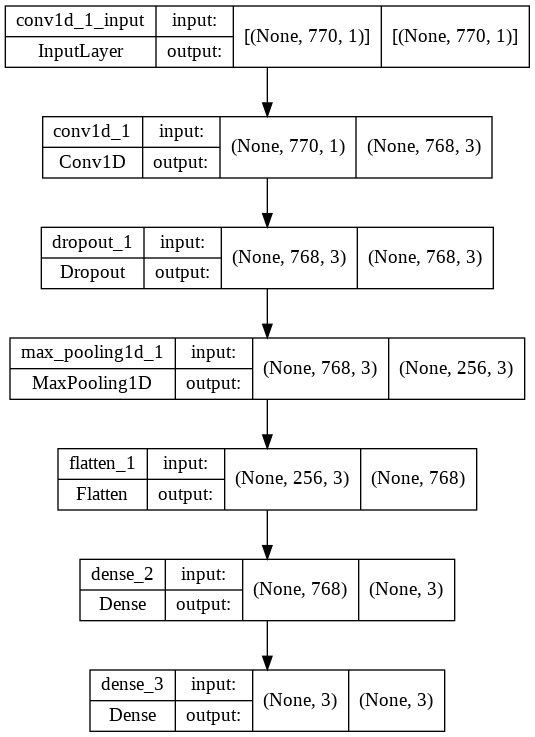

In [ ]:
model = Sequential()
model.add(Conv1D(filters=3, kernel_size=3, input_shape = (770,1), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=3))
#model.add(Conv1D(filters=3, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())

model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

#model = Model(inputs=[inputs1], outputs=outputs)
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,epochs = 10, batch_size =10)
model.save('model.h5')
# summarize
print(model.summary())
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model



#testLabels = list(test_data['sentiment'])
# load the model
model = load_model('model.h5')

# evaluate model on training dataset
loss, acc = model.evaluate([X_train], y_train, verbose=0)
print('Train Accuracy: %f' % (acc*100))

#testX_lstm,testX,testX,
# evaluate model on test dataset dataset
loss, acc = model.evaluate([X_test], y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 79.311818
Test Accuracy: 76.434427
